## Naive - Unthresholded

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import bct as bct
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Prepare the network for analysis.

Load the withdrawal correlation matrix.

In [2]:
naive_df = pd.read_csv('../../data/cFosCAN_alcohol_naive_orig_20180326.csv')

Set the index to the region labels.

In [3]:
naive_df = naive_df.set_index('Unnamed: 0')

Sort regions alphabetically.

In [4]:
naive_df = naive_df.sort_index()
naive_df = naive_df.sort_index(axis=1)

In [5]:
naive_mat = naive_df.as_matrix()

Zero-out the diagonal and save the matrix for analysis in MATLAB.

In [6]:
np.fill_diagonal(naive_mat, 0)

In [7]:
np.savetxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_naive_mat_20180526.csv', naive_mat)

Plotting functions do not play nice with negative edges or dense graphs, so we remove those when laying out the plot.

In [8]:
naive_mat_po = naive_mat.copy()

In [9]:
naive_mat_po[naive_mat_po < 0.80] = 0

In [10]:
G_po = nx.from_numpy_matrix(naive_mat_po)

#### Centrality (node strength)

In [53]:
node_strength = bct.degree.strengths_und_sign(naive_mat)

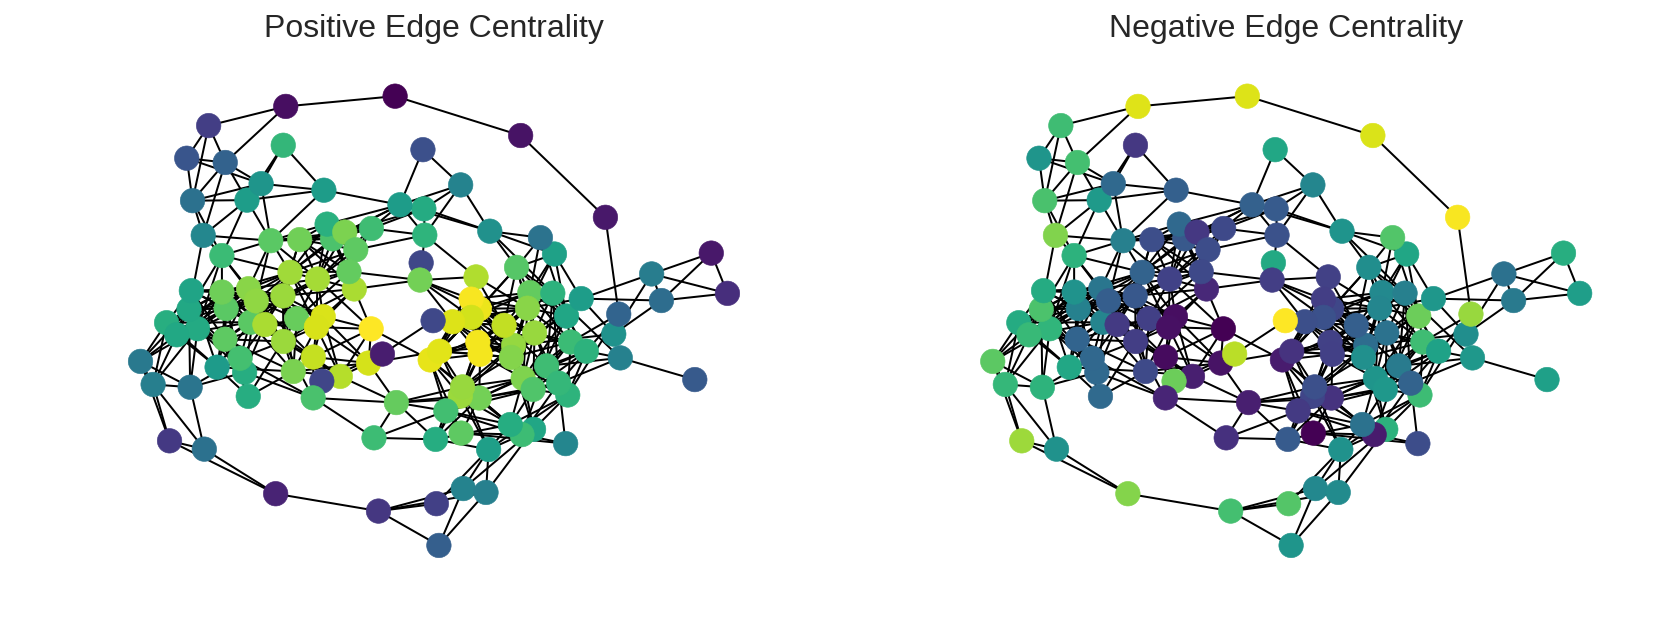

In [54]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = nx.draw_kamada_kawai(G_po, node_color=node_strength[0], node_size=150, cmap=plt.cm.viridis, ax=ax[0])
g = nx.draw_kamada_kawai(G_po, node_color=node_strength[1], node_size=150, cmap=plt.cm.viridis_r, ax=ax[1])
g = ax[0].set_title('Positive Edge Centrality', fontsize=16)
g = ax[1].set_title('Negative Edge Centrality', fontsize=16)

## Resolution Parameter = 1.0
These were calculated using the `run_louvain.m` Matlab script and gamma=1.0.

In [47]:
reordered_matrix = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_ReorderedMatrix.txt')

In [48]:
reordered_matrix = reordered_matrix.reshape(naive_mat.shape)

In [49]:
partition = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_GraphPartition.txt')

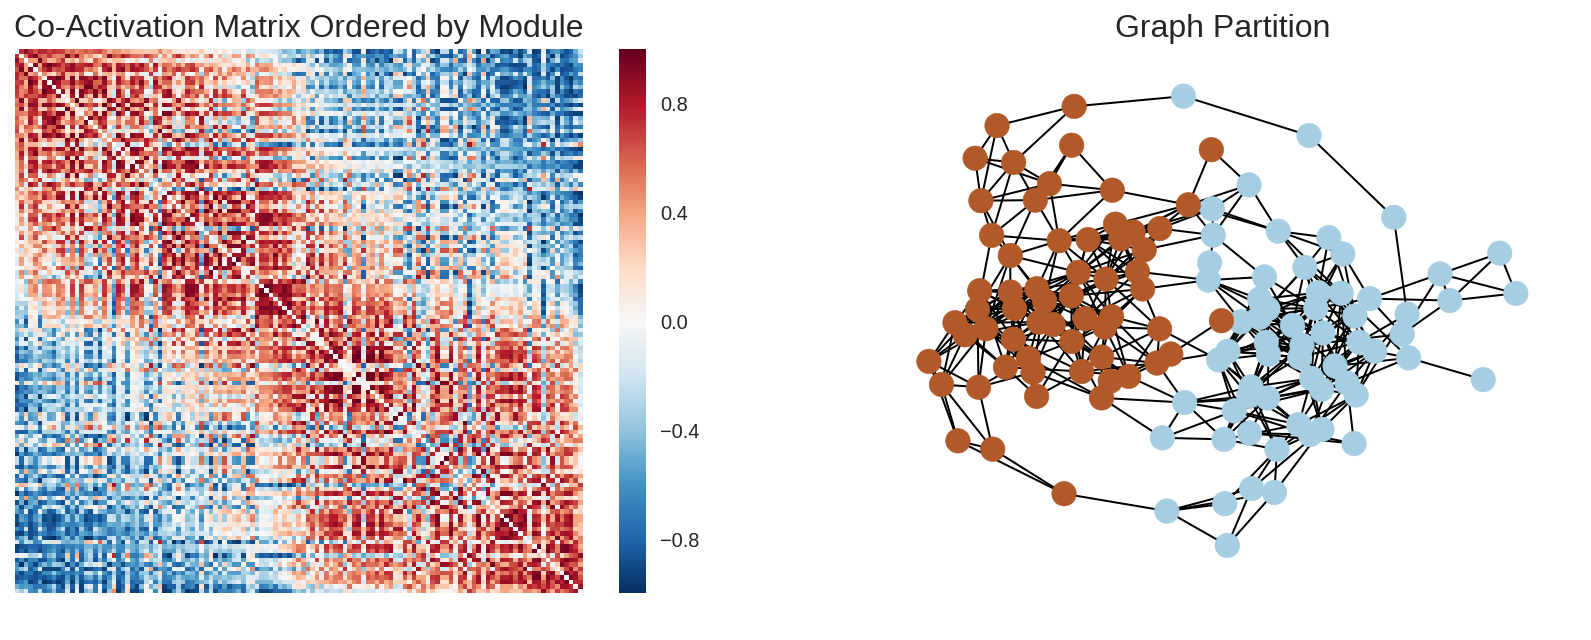

In [50]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = sns.heatmap(reordered_matrix, xticklabels=False, yticklabels=False, ax=ax[0], )
g = nx.draw_kamada_kawai(G_po, node_color=partition, node_size=150, cmap=plt.cm.Paired, ax=ax[1])
g = ax[0].set_title('Co-Activation Matrix Ordered by Module', fontsize=16)
g = ax[1].set_title('Graph Partition', fontsize=16)

### Within-Module Degree (z-scored)

In [51]:
wmdz = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_WMDz.txt')

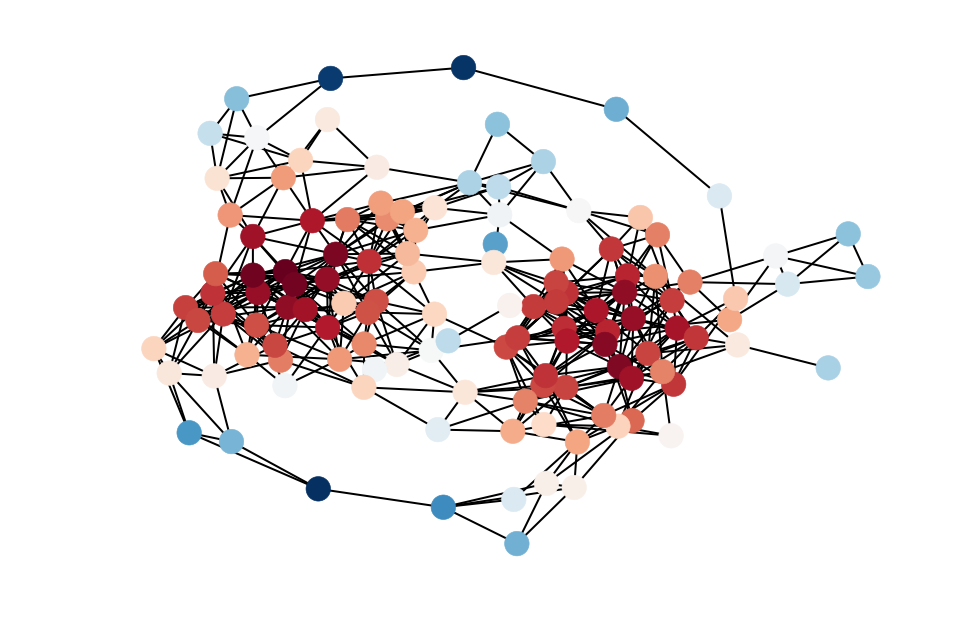

In [52]:
nx.draw_kamada_kawai(G_po, node_color=wmdz, node_size=150, cmap=plt.cm.RdBu_r)

### Participation Coefficient

In [55]:
pc_pos = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_PC_pos.txt')

In [56]:
pc_neg = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_PC_neg.txt')

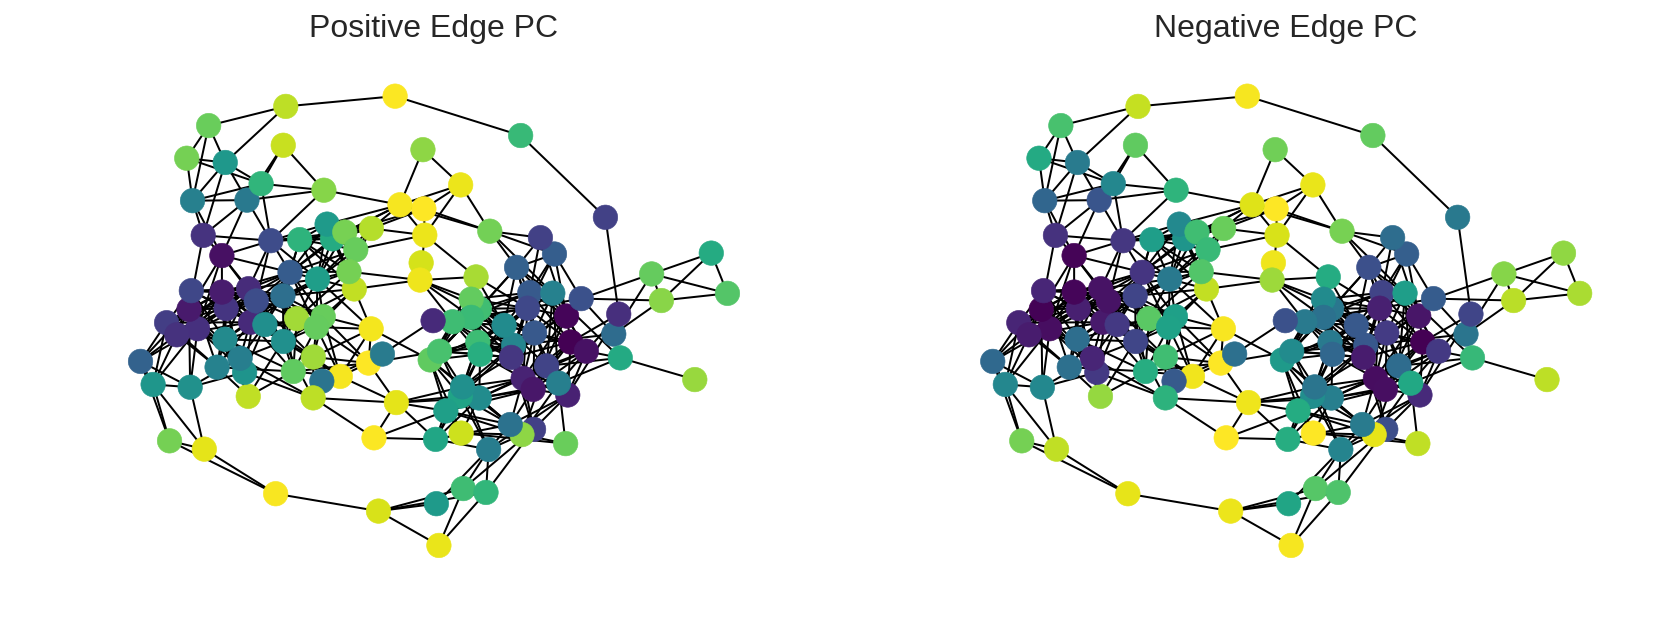

In [57]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
nx.draw_kamada_kawai(G_po, node_color=pc_pos, node_size=150, cmap=plt.cm.viridis, ax=ax[0])
nx.draw_kamada_kawai(G_po, node_color=pc_neg, node_size=150, cmap=plt.cm.viridis, ax=ax[1])
g = ax[0].set_title('Positive Edge PC', fontsize=16)
g = ax[1].set_title('Negative Edge PC', fontsize=16)

Combine all our results into a single spreadsheet.

In [58]:
combined_df = pd.DataFrame(np.array([node_strength[0], node_strength[1], partition, pc_pos, pc_neg, wmdz]).T,
                           columns=['centrality_pos', 'centrality_neg', 'partition', 'pc_pos', 'pc_neg', 'wmdz'])

In [59]:
#combined_df = combined_df.set_index(manual_partition_df.iloc[disconnected_regions.values,2].index)
combined_df = combined_df.set_index(naive_df.index)

In [60]:
combined_df.index.names = ['Region']

Save the combined spreadsheet to disk.

In [61]:
combined_df.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma1.0_combined_results.csv', sep=',')

## Resolution Parameter = 3.55
These were calculated using the `run_louvain.m` Matlab script and gamma=3.55.

In [32]:
reordered_matrix = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_ReorderedMatrix.txt')

In [33]:
reordered_matrix = reordered_matrix.reshape(naive_mat.shape)

In [34]:
partition = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_GraphPartition.txt')

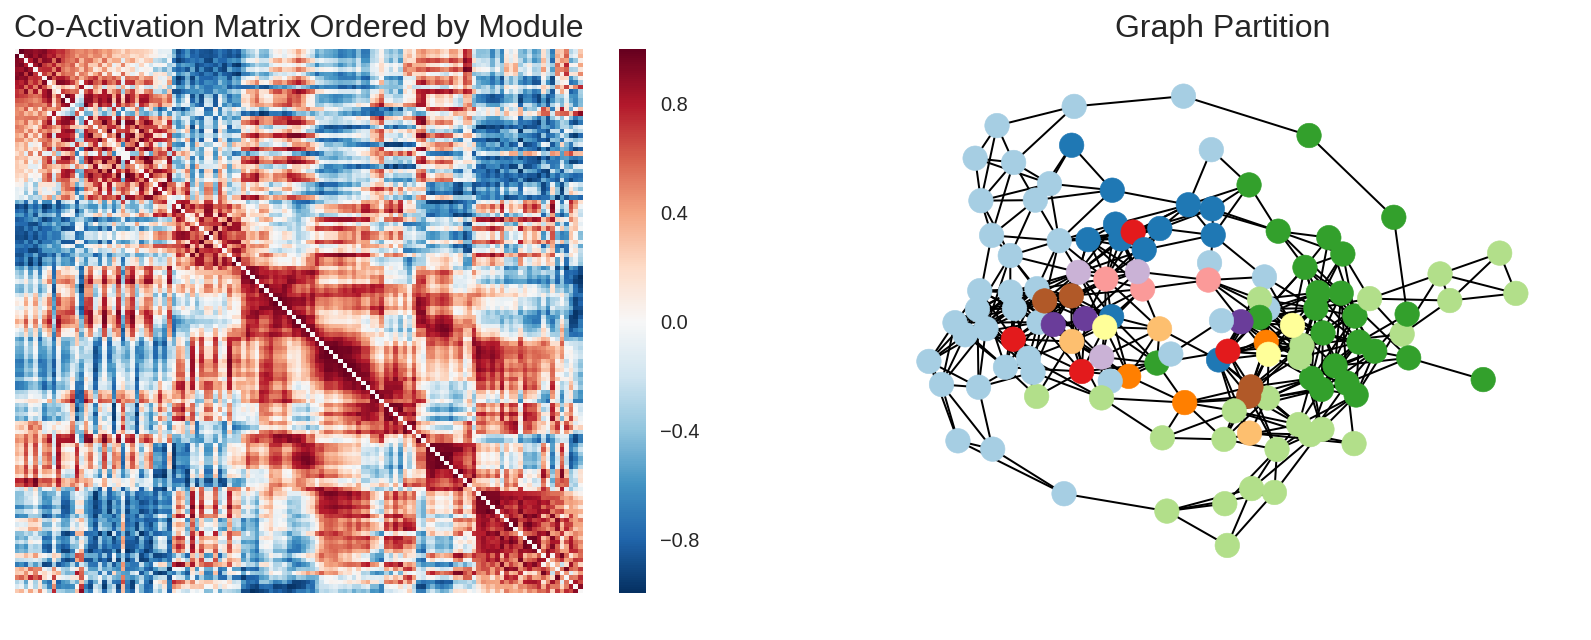

In [35]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = sns.heatmap(reordered_matrix, xticklabels=False, yticklabels=False, ax=ax[0], )
g = nx.draw_kamada_kawai(G_po, node_color=partition, node_size=150, cmap=plt.cm.Paired, ax=ax[1])
g = ax[0].set_title('Co-Activation Matrix Ordered by Module', fontsize=16)
g = ax[1].set_title('Graph Partition', fontsize=16)

### Within-Module Degree (z-scored)

In [36]:
wmdz = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_WMDz.txt')

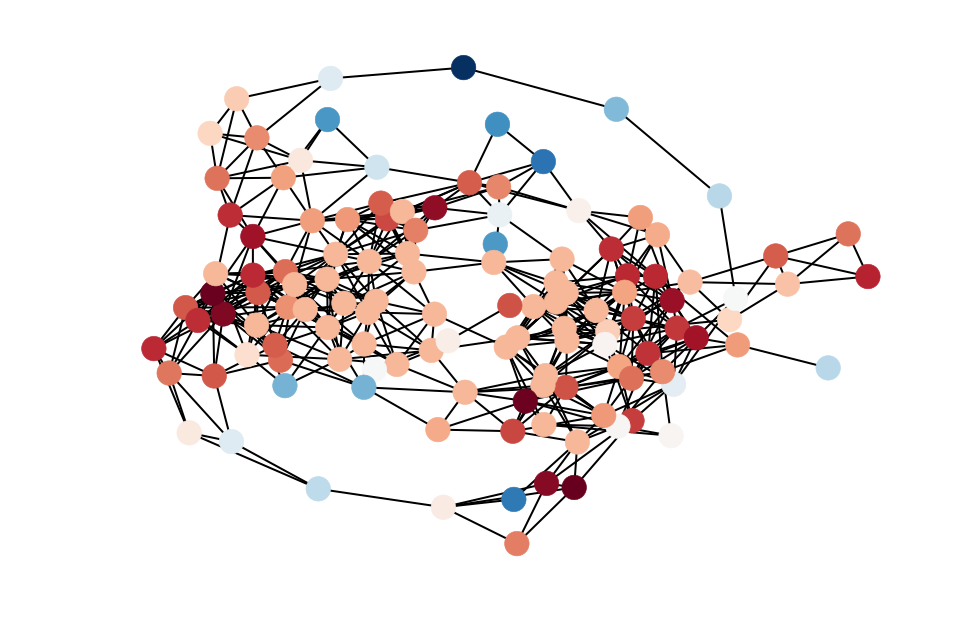

In [37]:
nx.draw_kamada_kawai(G_po, node_color=wmdz, node_size=150, cmap=plt.cm.RdBu_r)

### Participation Coefficient

In [40]:
pc_pos = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_PC_pos.txt')

In [41]:
pc_neg = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_PC_neg.txt')

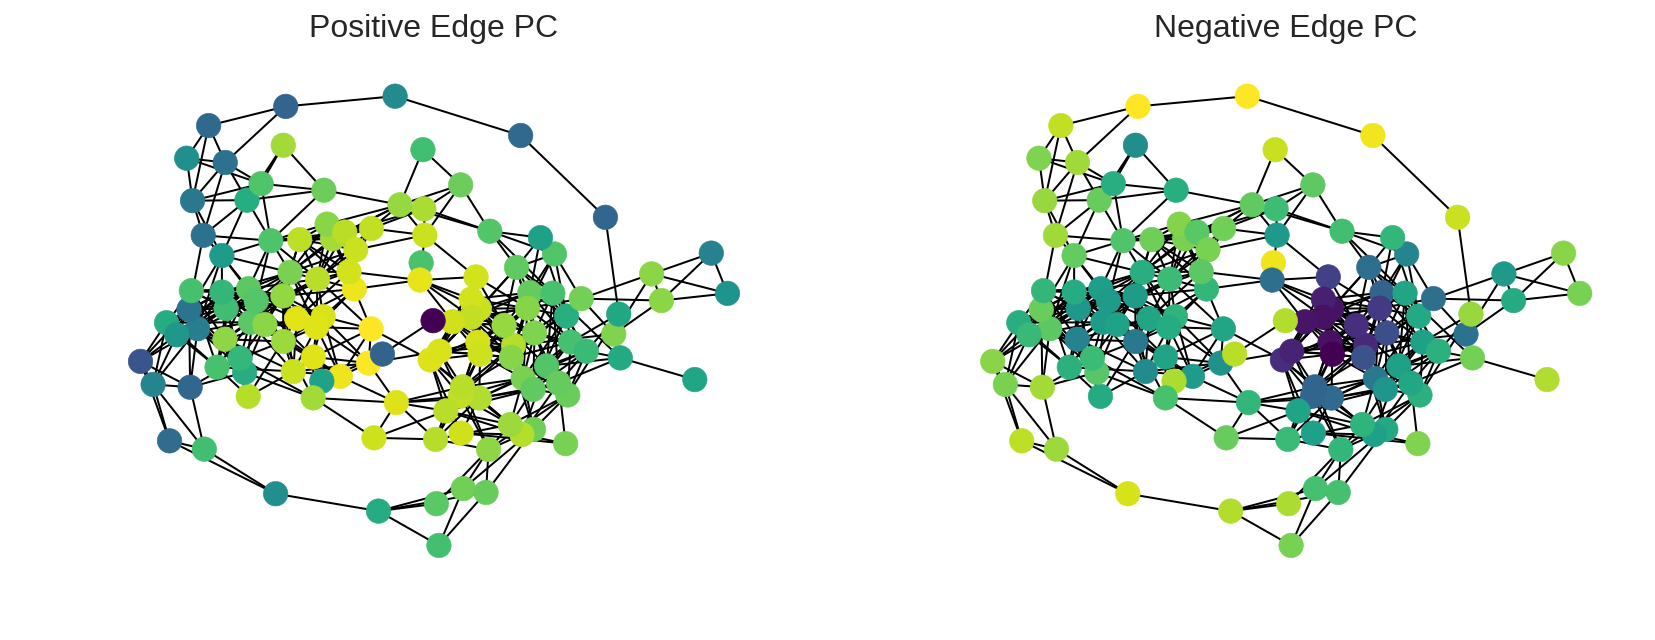

In [42]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
nx.draw_kamada_kawai(G_po, node_color=pc_pos, node_size=150, cmap=plt.cm.viridis, ax=ax[0])
nx.draw_kamada_kawai(G_po, node_color=pc_neg, node_size=150, cmap=plt.cm.viridis, ax=ax[1])
g = ax[0].set_title('Positive Edge PC', fontsize=16)
g = ax[1].set_title('Negative Edge PC', fontsize=16)

Combine all our results into a single spreadsheet.

In [43]:
combined_df = pd.DataFrame(np.array([node_strength[0], node_strength[1], partition, pc_pos, pc_neg, wmdz]).T,
                           columns=['centrality_pos', 'centrality_neg', 'partition', 'pc_pos', 'pc_neg', 'wmdz'])

In [44]:
combined_df = combined_df.set_index(naive_df.index)

In [45]:
combined_df.index.names = ['Region']

Save the combined spreadsheet to disk.

In [46]:
combined_df.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/results/naive_nothresh/gamma3.55_combined_results.csv', sep=',')